In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def show_image(title, image):
  """
  Menampilkan citra dengan visual biner

  atau mencetak informasi matriks
  """

  # Menampilkan visual
  plt.imshow(image, cmap='gray')
  plt.title(title)
  plt.axis('off')
  plt.show()

  # Mencetak matriks
  print(image)
  
  return None

In [24]:
def morfologi(title, input_mat):
  """
  Melakukan operasi morfologi pada citra biner dengan opencv
  
  Parameters:
    - title (str): Jenis operasi ('Dilated', 'Eroded', 'Opened', 'Closed').
    - input_mat (numpy.ndarray): Citra input dalam format numpy array.
  """

  # Pemetaan operasi
  operations = {
    'Dilated': cv2.dilate,
    'Eroded': cv2.erode,
    'Opened': lambda img, elem: cv2.morphologyEx(img, cv2.MORPH_OPEN, elem),
    'Closed': lambda img, elem: cv2.morphologyEx(img, cv2.MORPH_CLOSE, elem)
  }  

  if title not in operations:
    raise ValueError("Invalid operation title. Choose from 'Dilated', 'Eroded', 'Opened', 'Closed'.")
  
  # Structuing element 3x3
  # [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
  struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

  # Melakukan operasi morfologi
  result = operations[title](input_mat, struct_elem)
  show_image(title, result)

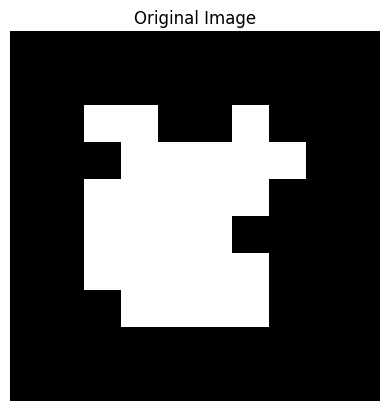

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0 255 255   0   0 255   0   0   0]
 [  0   0   0 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [25]:
# Matriks biner 10x10
binary_image = np.array([
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
  [0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
  [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.uint8) * 255

_ = show_image('Original Image', binary_image)

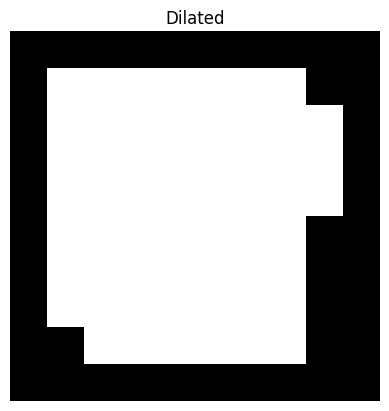

[[  0   0   0   0   0   0   0   0   0   0]
 [  0 255 255 255 255 255 255 255   0   0]
 [  0 255 255 255 255 255 255 255 255   0]
 [  0 255 255 255 255 255 255 255 255   0]
 [  0 255 255 255 255 255 255 255 255   0]
 [  0 255 255 255 255 255 255 255   0   0]
 [  0 255 255 255 255 255 255 255   0   0]
 [  0 255 255 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255 255   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [26]:
_ = morfologi("Dilated", binary_image)

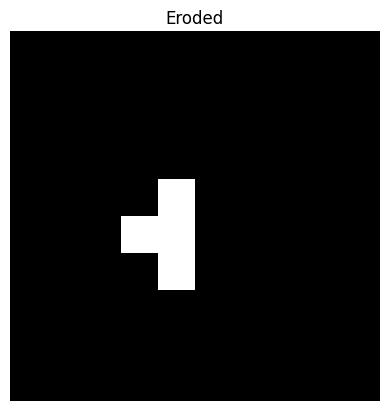

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 255   0   0   0   0   0]
 [  0   0   0 255 255   0   0   0   0   0]
 [  0   0   0   0 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [27]:
_ = morfologi("Eroded", binary_image)

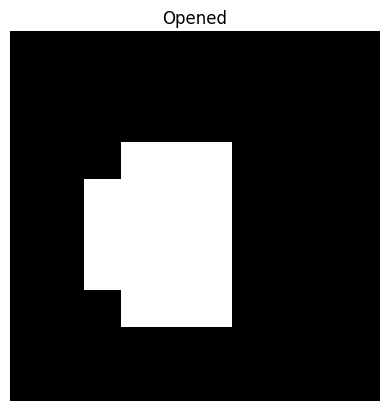

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0   0 255 255 255   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [28]:
_ = morfologi("Opened", binary_image)

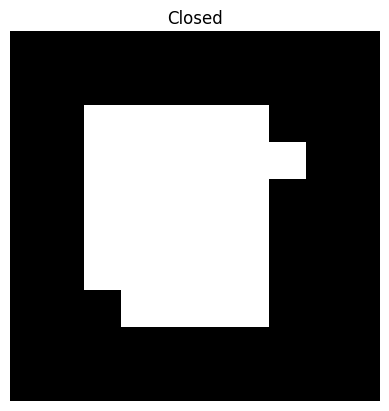

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [29]:
_ = morfologi("Closed", binary_image)

In [ ]:
# EOP